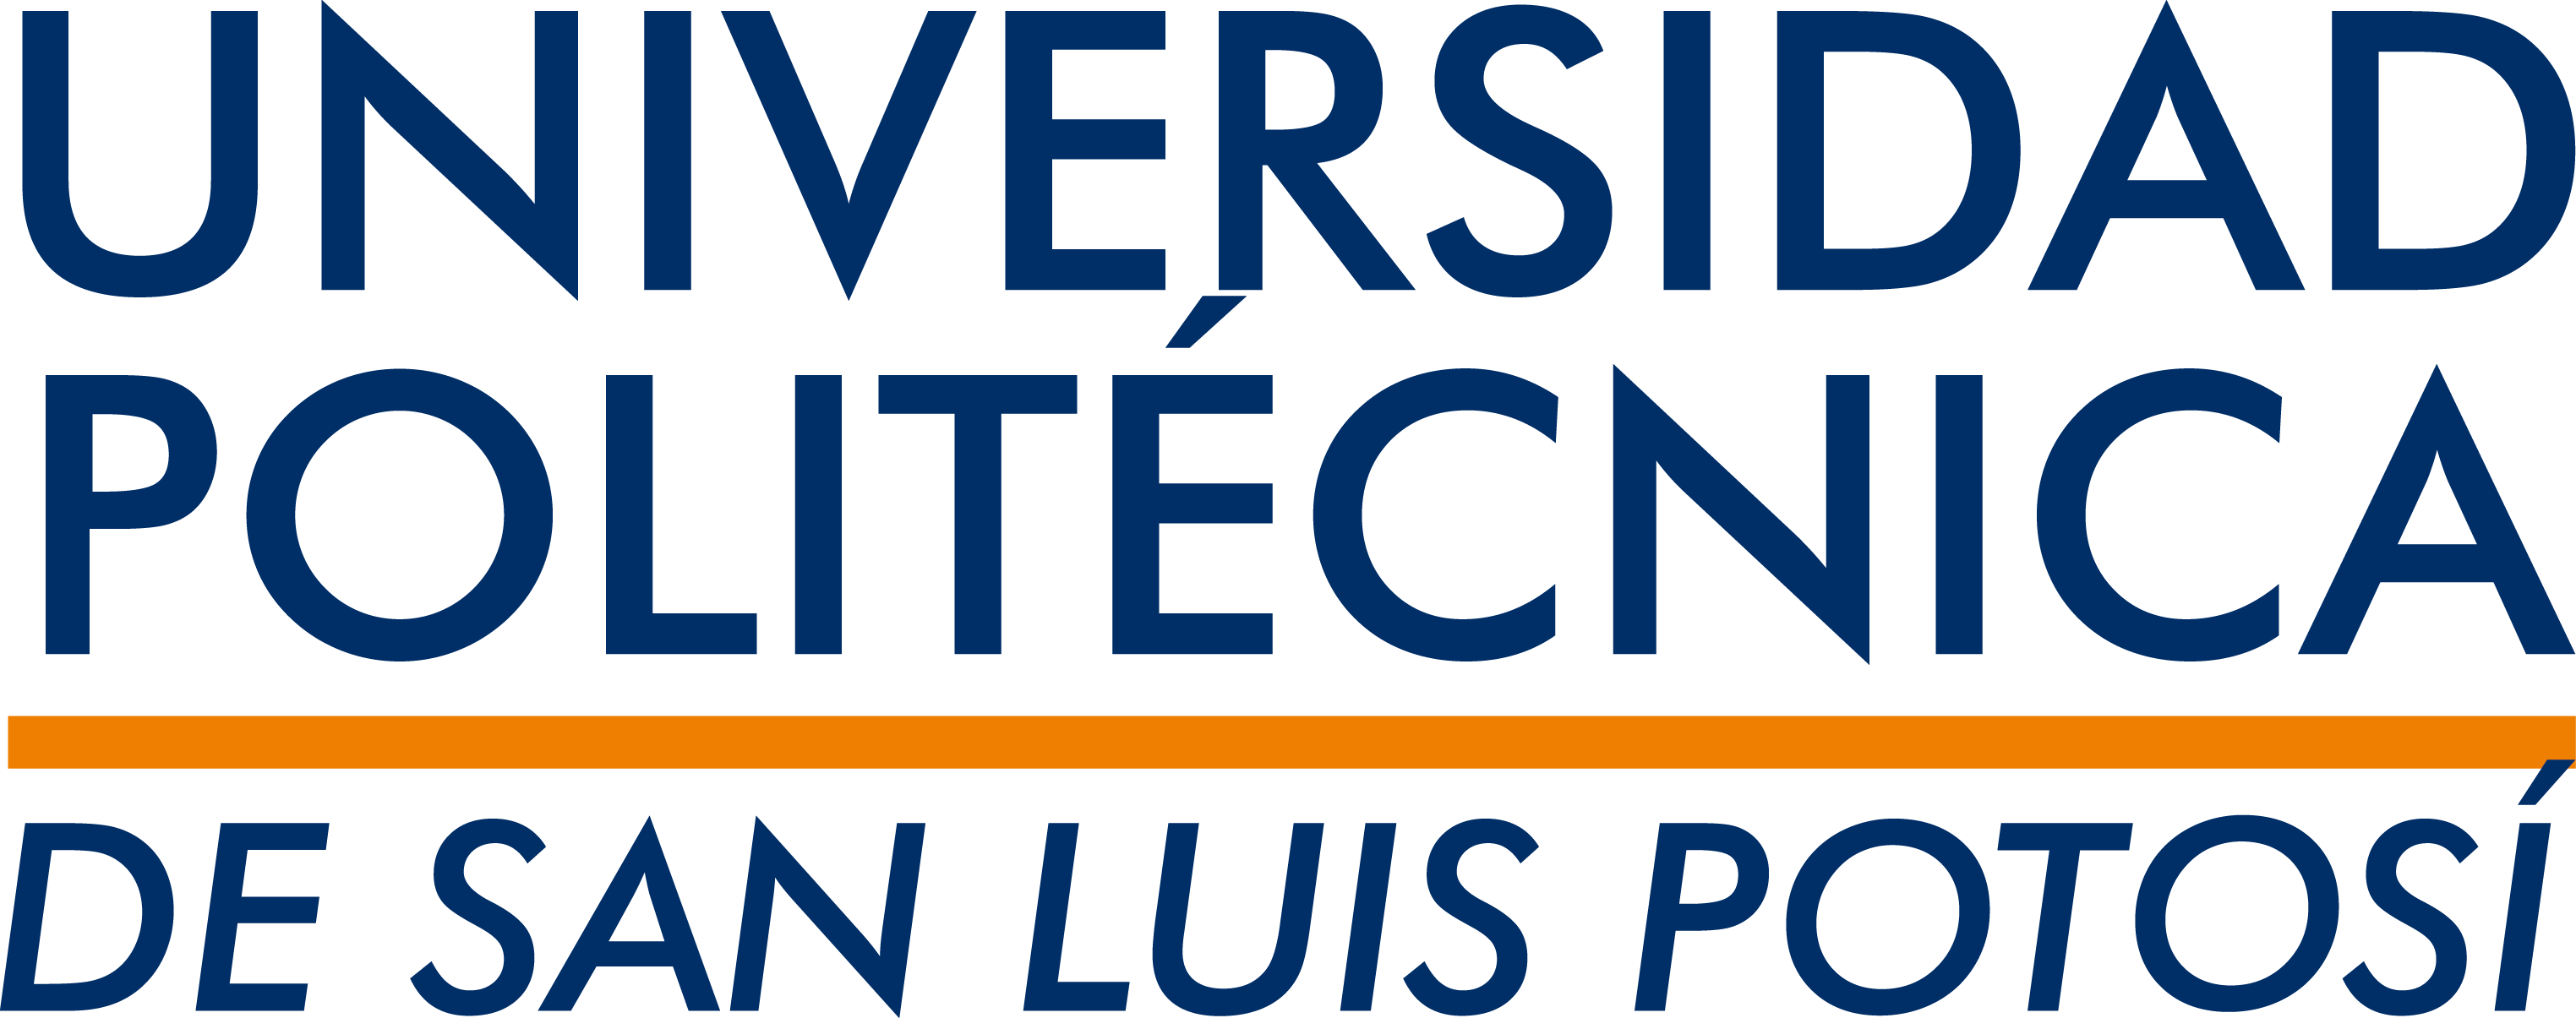
## PROYECTO PLN Procesamiento de Lenguaje Natural en Noticias
#Universidad Politecnica de San Luis Potosí
#Inteligencia Artificial 2

##Profesor
1.   Manuel Chávez Pérez

##Alumnos
1.   Emiliano Chequer Enriquez 180016
2.   Jorge Matadamas Cortes 180789
3.   Axel Rivera Saldaña 180606





##Librerias

In [ ]:
from bs4 import BeautifulSoup as soup
import requests
import os             # Provee una manera versátil de usar funcionalidades dependiendo del S.O.
import random         # generadores de números pseudoaleatorios para varias distribuciones
import nltk           # Natural Language Toolkit - NLTK is a leading platform for building Python programas to work with human language data.
import pandas as pd   # Se especializa en el manejo, análisis y procesamiento de datos
import os
import random
#es un conjunto de bibliotecas y programas para el procesamiento del lenguaje natural simbólico y estadísticos para el lenguaje de programación Python.
!pip install nltk
import nltk
#PUNKT es un modelo entrenable no supervisado, lo que significa que puede entrenarse con datos no etiquetados
nltk.download("punkt")
#NumPy es una biblioteca para Python que agrega soporte para arreglos y matrices grandes y multidimensionales
import pandas as pd
#Pandas es una herramienta de manipulación de datos de alto nivel que se basa en el paquete NumPy.
import numpy as np
#sklearn es un conjunto de herramientas eficientes para el aprendizaje automático y el modelado estadístico, incluidas la clasificación, la regresión, el agrupamiento y la reducción de la dimensionalidad.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# split puede ser útil o incluso necesario dividir o separar un Python string.
!pip install sentence_splitter
from sentence_splitter import SentenceSplitter
splitter = SentenceSplitter(language = 'es')
# tipos de datos de contenedores, a saber, listas, conjuntos, tuplas, diccionario
import collections

from nltk.probability import ConditionalFreqDist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Obtener las noticias del URL

In [ ]:
#Preparamos el link de la página de noticias llamada "El puso"
elpulso="https://pulsoslp.com.mx/"

In [ ]:
#relizamosuna solicitud a una página web
r=requests.get("https://pulsoslp.com.mx/")

In [ ]:
#Extraemos la información de contenido en formato lXML del link de la página
b=soup(r.content,'lxml')

#Guardar en una lista cada titulo separado

In [ ]:
new_array = []#creamos una variable para guardar la lista
for news in b.findAll('h2'):#devolvemos las secuencias con lo que contenga la cadena con etiqueta h2
    new_array.append(news.text.strip()) #guardamos las nocticias en la lista
print(new_array) #imprimimos la variable

['Amparo a X. Nava anula inhabilitación', 'Le redujeron al Congreso 165.4 mdp para 2023', 'Messi y Álvarez  clasifican a Argentina a los cuartos de final de Qatar', 'El Vaticano enciende su árbol de Navidad', 'Asesinan a joven en la plaza de Villa de Ramos', 'Amazonia pierde el 10% de su vegetación', 'Insiste Marko Cortés que Gallardo tiene nexos con el narcotráfico', 'Este sábado reportan 47 nuevos casos  y ocho personas hospitalizadas por covid', 'Ladrones no respetan ni sede de Gobernación', '"Coctel" de virus detona afecciones respiratorias', 'Personas con Discapacidad exigen sensibilidad e inclusión en marcha para conmemorar su día', 'Pasajero armado despoja a conductor de Uber de su vehículo']


In [ ]:
texto = ""	# Leer texto

In [ ]:
links=[] #hacemos variable para leer los links
for news in b.findAll('h2',{'class':'entry-title td-module-title'})  : #asignamos los links a la lista
    links.append(news.a['href']) #concatenamos

In [ ]:
links #imprimimos los links que se encuentran dentro de la lista

['/slp/amparo-a-x-nava-anula-inhabilitacion/1582936',
 '/slp/le-redujeron-al-congreso-1654-mdp-para-2023/1582938',
 '/meta/messi-y-alvarez--clasifican-a-argentina-a-los-cuartos-de-final-de-qatar/1583120',
 '/mundo/el-vaticano-enciende-su-arbol-de-navidad/1583035',
 '/seguridad/asesinan-a-joven-en-la-plaza-de-villa-de-ramos/1582829',
 '/mundo/amazonia-pierde-el-10-de-su-vegetacion/1582918',
 '/slp/insiste-marko-cortes-que-gallardo-tiene-nexos-con-el-narcotrafico/1583090',
 '/slp/este-sabado-reportan-47-nuevos-casos--y-ocho-personas-hospitalizadas-por-covid/1583037',
 '/slp/ladrones-no-respetan-ni-sede-de-gobernacion/1582866',
 '/slp/coctel-de-virus-detona-afecciones-respiratorias/1582869',
 '/slp/personas-con-discapacidad-exigen-sensibilidad-e-inclusion-en-marcha-para-conmemorar-su-dia/1583034',
 '/seguridad/pasajero-armado-despoja-a-conductor-de-uber-de-su-vehiculo/1583085']

#Guardar noticia en una lista

In [ ]:
#creamos variables de apoyo
textos=[]
new_array1 = []
for link in links: #empezamos un siclo for para los links que se ingresaron
    page = requests.get("https://pulsoslp.com.mx"+link) #accedemos a los recursos web a través de HTTP
    bsobj=soup(page.content)#extraemos la información
    for news in bsobj.findAll('div',{'class':'td-paragraph-padding-0'}):#devolvemos lo que tiene esa información
        new_array1.append(news.text.strip()) #añadimos al arreglo para guardarlas

print(len(new_array1));#contabilizamos cuantas noticias se extrajeron




12


#Guardar noticia completa en txt

In [ ]:
#creamos carpeta con el nombre de "noticias"
!mkdir noticias

mkdir: cannot create directory ‘noticias’: File exists


In [ ]:
m=0
#creamos una variable de titulo para guadar el arreglo de los titulos extraidos
for titulo in new_array:
        m=m+1
        with open("noticias/"+titulo+str(m)+".txt","w") as variable_name: #abrimos los tictolos le agregamos el metodo de escritura para txt y lo asignamos a la variable
                variable_name.close()#cerramos el archivo


In [ ]:
m=0
#ahora mientras haya una noticia se ingresará al titulo
for titulo,noticia in zip(new_array, new_array1):
    m=m+1
    with open("noticias/"+titulo+str(m)+".txt","w") as variable_name:#abrimos la carpeta donde estan alojados los titulos de las noticias
        variable_name.write(noticia)#y en el campo se agrega la noticia completa en un txt con el nombre de la notica cprrespondiente
        variable_name.close()

#Mostrar un sección de noticias extraidas

In [ ]:
print("Bienvenido a la seccion de noticias de noticias:")#imprimimos el titulo
n=1
#con el ciclo imprimimos las noticias
for titulo in new_array:
    print(str(n)+"- "+titulo+"\n")
    n=n+1

Bienvenido a la seccion de noticias de noticias:
1- Amparo a X. Nava anula inhabilitación

2- Le redujeron al Congreso 165.4 mdp para 2023

3- Messi y Álvarez  clasifican a Argentina a los cuartos de final de Qatar

4- El Vaticano enciende su árbol de Navidad

5- Asesinan a joven en la plaza de Villa de Ramos

6- Amazonia pierde el 10% de su vegetación

7- Insiste Marko Cortés que Gallardo tiene nexos con el narcotráfico

8- Este sábado reportan 47 nuevos casos  y ocho personas hospitalizadas por covid

9- Ladrones no respetan ni sede de Gobernación

10- "Coctel" de virus detona afecciones respiratorias

11- Personas con Discapacidad exigen sensibilidad e inclusión en marcha para conmemorar su día

12- Pasajero armado despoja a conductor de Uber de su vehículo



#Buscar una palabra en las noticias

In [ ]:
#También es para hacer la tokenización, pero también se quita los caracteres señalados, en pocas palabras este bloque de código hace lo mismo que los demás, pero en un solo bloque
def tokenizar(texto):
  #buscamos simbolos para sacarlos de la cadena de texto
    puntuacion = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~¿¡..'
    #usamos un especializador para tokenizar enfocado al idioman español
    tokens = nltk.word_tokenize(texto,"spanish")
    #recorremos los tokens
    for i,token in enumerate(tokens):
        tokens[i] = token.strip(puntuacion)
        #sustituimos los caracteres por espacios vacios
    texto = " ".join(tokens)
    tokens = nltk.word_tokenize(texto,"spanish")
    return tokens

In [ ]:
#Es el metodo de Normalización
def stemmizar(tokens):
  #Su objetivo es reducir la forma de las palabras
    stemmer = nltk.stem.SnowballStemmer("spanish")
    stems = []
    for token in tokens:
        stem = stemmer.stem(token)
        stems.append(stem)
    return stems

In [ ]:
#Se crea un nuevo indice, pero ahora se normaliza a minúsculas
indice = {}
w=1
#asignamos variable a la carpeta donde se encuentran los txt
n = os.listdir("noticias")
for archivo in n:
    w=w+1
    with open("noticias/"+archivo,"r", encoding="utf8") as variable_name: #abrimos la carpeta de "noticias"
    #normalizamos texto a minusculas
        texto = variable_name.read()
        texto = texto.lower()
    tokens = tokenizar(texto)
    vocabulario = set(tokens)
    for entrada in vocabulario:
        if entrada not in indice:
            indice[entrada] = set()
        indice[entrada].add(archivo)

In [ ]:
indice["san"] #hacemos la busqueda de la palabra "tercer"

{'El Vaticano enciende su árbol de Navidad4.txt',
 'Insiste Marko Cortés que Gallardo tiene nexos con el narcotráfico7.txt',
 'Pasajero armado despoja a conductor de Uber de su vehículo12.txt',
 'Personas con Discapacidad exigen sensibilidad e inclusión en marcha para conmemorar su día11.txt'}

In [ ]:
indice #mostramos el indice

{'considerarse': {'"Coctel" de virus detona afecciones respiratorias10.txt'},
 'navideñas.agregó': {'"Coctel" de virus detona afecciones respiratorias10.txt'},
 'otros': {'"Coctel" de virus detona afecciones respiratorias10.txt',
  'Amazonia pierde el 10% de su vegetación6.txt',
  'Personas con Discapacidad exigen sensibilidad e inclusión en marcha para conmemorar su día11.txt'},
 '3': {'"Coctel" de virus detona afecciones respiratorias10.txt',
  'Este sábado reportan 47 nuevos casos  y ocho personas hospitalizadas por covid8.txt'},
 'de': {'"Coctel" de virus detona afecciones respiratorias10.txt',
  'Amazonia pierde el 10% de su vegetación6.txt',
  'Amparo a X. Nava anula inhabilitación1.txt',
  'Asesinan a joven en la plaza de Villa de Ramos5.txt',
  'El Vaticano enciende su árbol de Navidad4.txt',
  'Este sábado reportan 47 nuevos casos  y ocho personas hospitalizadas por covid8.txt',
  'Insiste Marko Cortés que Gallardo tiene nexos con el narcotráfico7.txt',
  'Ladrones no respetan

In [ ]:
palabra = input() #asignamos variable a la entrada de la palabra que sera buscada
palabra in new_array1
#empezmos ciclo
#si la palabra se encuentra nos va a decir en que archivos se encuentra
if palabra in indice :
    print("Se ha encontrado la palabra en la noticia: ")
    print(indice[palabra])
    #si no, nos va a mostrar un mensaje de que no se encontro
else:
    print("NO se encontraron palabras referentes")

san
Se ha encontrado la palabra en la noticia: 
{'Insiste Marko Cortés que Gallardo tiene nexos con el narcotráfico7.txt', 'Pasajero armado despoja a conductor de Uber de su vehículo12.txt', 'El Vaticano enciende su árbol de Navidad4.txt', 'Personas con Discapacidad exigen sensibilidad e inclusión en marcha para conmemorar su día11.txt'}


#Listar los titulos donde aparece la palabra con más relevancia

In [ ]:
#asignamos a la variable "listar_archivos" a la carpeta donde se encuentran las noticias
lista_archivos = ["noticias/"+archivo for archivo in n]
#empezamos a usar la función de vectorizador
vectorizador = TfidfVectorizer(input="filename",analyzer="word",sublinear_tf=True)
#Permite crear una función vectorizada a partir de una que no lo es, lo que nos permite aplicar esta última a un array.
matriz_tfidf = vectorizador.fit_transform(lista_archivos)
vocabulario = vectorizador.get_feature_names()
#asignamos la tabla_tfidf la matriz de los archivos xon la palabra mas frecuente
tabla_tfidf = pd.DataFrame(matriz_tfidf.toarray(),index=n,columns=vocabulario)
tabla_tfidf

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00       000  \
"Coctel" de virus detona afecciones respiratori...  0.000000  0.000000   
Le redujeron al Congreso 165.4 mdp para 20232.txt   0.000000  0.000000   
Amazonia pierde el 10% de su vegetación6.txt        0.000000  0.139235   
Asesinan a joven en la plaza de Villa de Ramos5...  0.000000  0.000000   
El Vaticano enciende su árbol de Navidad4.txt       0.000000  0.000000   
Insiste Marko Cortés que Gallardo tiene nexos c...  0.000000  0.000000   
Ladrones no respetan ni sede de Gobernación9.txt    0.000000  0.000000   
Personas con Discapacidad exigen sensibilidad e...  0.112337  0.000000   
Amparo a X. Nava anula inhabilitación1.txt          0.000000  0.000000   
Pasajero armado despoja a conductor de Uber de ...  0.000000  0.000000   
Este sábado reportan 47 nuevos casos  y ocho pe...  0.000000  0.000000   
Messi y Álvarez  clasifican a Argentina a los c...  0.000000  0.033641   

                                                         032       062  \
"Coctel" de virus detona afecciones respiratori...  0.000000  0.000000   
Le redujeron al Congreso 165.4 mdp para 20232.txt   0.000000  0.067083   
Amazonia pierde el 10% de su vegetación6.txt        0.000000  0.000000   
Asesinan a joven en la plaza de Villa de Ramos5...  0.000000  0.000000   
El Vaticano enciende su árbol de Navidad4.txt       0.000000  0.000000   
Insiste Marko Cortés que Gallardo tiene nexos c...  0.000000  0.000000   
Ladrones no respetan ni sede de Gobernación9.txt    0.000000  0.000000   
Personas con Discapacidad exigen sensibilidad e...  0.000000  0.000000   
Amparo a X. Nava anula inhabilitación1.txt          0.000000  0.000000   
Pasajero armado despoja a conductor de Uber de ...  0.000000  0.000000   
Este sábado reportan 47 nuevos casos  y ocho pe...  0.000000  0.000000   
Messi y Álvarez  clasifican a Argentina a los c...  0.039171  0.000000   

                                                          10        11  \
"Coctel" de virus detona afecciones respiratori...  0.000000  0.000000   
Le redujeron al Congreso 165.4 mdp para 20232.txt   0.050892  0.000000   
Amazonia pierde el 10% de su vegetación6.txt        0.047134  0.000000   
Asesinan a joven en la plaza de Villa de Ramos5...  0.000000  0.000000   
El Vaticano enciende su árbol de Navidad4.txt       0.000000  0.000000   
Insiste Marko Cortés que Gallardo tiene nexos c...  0.000000  0.000000   
Ladrones no respetan ni sede de Gobernación9.txt    0.000000  0.000000   
Personas con Discapacidad exigen sensibilidad e...  0.050334  0.000000   
Amparo a X. Nava anula inhabilitación1.txt          0.000000  0.068334   
Pasajero armado despoja a conductor de Uber de ...  0.000000  0.000000   
Este sábado reportan 47 nuevos casos  y ocho pe...  0.000000  0.000000   
Messi y Álvarez  clasifican a Argentina a los c...  0.000000  0.000000   

                                                          15       150  \
"Coctel" de virus detona afecciones respiratori...  0.000000  0.000000   
Le redujeron al Congreso 165.4 mdp para 20232.txt   0.000000  0.057612   
Amazonia pierde el 10% de su vegetación6.txt        0.000000  0.000000   
Asesinan a joven en la plaza de Villa de Ramos5...  0.000000  0.000000   
El Vaticano enciende su árbol de Navidad4.txt       0.000000  0.000000   
Insiste Marko Cortés que Gallardo tiene nexos c...  0.078053  0.000000   
Ladrones no respetan ni sede de Gobernación9.txt    0.000000  0.000000   
Personas con Discapacidad exigen sensibilidad e...  0.000000  0.056980   
Amparo a X. Nava anula inhabilitación1.txt          0.000000  0.000000   
Pasajero armado despoja a conductor de Uber de ...  0.000000  0.000000   
Este sábado reportan 47 nuevos casos  y ocho pe...  0.000000  0.000000   
Messi y Álvarez  clasifican a Argentina a los c...  0.000000  0.000000   

                                                         165        18  ...  \
"Coctel" de virus detona afecciones respiratori...  0.000000  0.000000  ...   
Le redujeron al Congreso 165.4 mdp para 20232.tx

In [ ]:
#imprimimos los primeros TOP 5  archivos que tengan una frecuencia con la palabra seleccionada
tabla_tfidf[[palabra]].sum(axis=1).sort_values(ascending=False).head(5)


Insiste Marko Cortés que Gallardo tiene nexos con el narcotráfico7.txt                              0.089989
Pasajero armado despoja a conductor de Uber de su vehículo12.txt                                    0.084433
Personas con Discapacidad exigen sensibilidad e inclusión en marcha para conmemorar su día11.txt    0.045179
El Vaticano enciende su árbol de Navidad4.txt                                                       0.036019
"Coctel" de virus detona afecciones respiratorias10.txt                                             0.000000
dtype: float64

In [ ]:
#Definimos una función donde almacenaremos la variable de apoyo que contienen los titulos
def llenado(apoyo):
    texto = apoyo
    texto = splitter.split(text = texto)
    #retormnamos el texto
    return texto

In [ ]:
i=0
texto=[]
tex=[]
topTitles=tabla_tfidf[[palabra]].sum(axis=1).sort_values(ascending=False).head(5).index.tolist()
for i,nueva in enumerate(topTitles):
  #empezamos a leer las noticias para abrir los titulos
  f = open("./noticias/"+nueva,'r')#abrimos noticias
  apoyo= f.readlines()[0] #imprimimos la primer linea que tengan los archivos que en este caso es el titulo
  new_string = nueva.replace('.txt', '')
  print(str(i+1)+". "+new_string)
  texto.append(apoyo)	# Leer texto
#importamos la libreria split
from sentence_splitter import SentenceSplitter
splitter = SentenceSplitter(language = 'es')#en idioma español



#importaos la lobreria para empezar a tokenizar los titulos
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texto) 			# Ajusta el conjunto X para obtener el valor TF-IDF
vocabulario = vectorizer.get_feature_names_out() 	# Convertir el texto en una matriz de funciones TF-IDF
tabla_tfidf = pd.DataFrame(X.toarray(), index = texto, columns = vocabulario)
tabla_tfidf	#Mostrar la tabla de valores TF-IDF

1. Insiste Marko Cortés que Gallardo tiene nexos con el narcotráfico7
2. Pasajero armado despoja a conductor de Uber de su vehículo12
3. Personas con Discapacidad exigen sensibilidad e inclusión en marcha para conmemorar su día11
4. El Vaticano enciende su árbol de Navidad4
5. "Coctel" de virus detona afecciones respiratorias10


00        10  \
Al igual que en las campañas del proceso electo...  0.000000  0.000000   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.000000   
En la conmemoración del Día Internacional de la...  0.076566  0.038283   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.000000  0.000000   
Ahora que se mantienen los contagios de virus s...  0.000000  0.000000   

                                                         15       150  \
Al igual que en las campañas del proceso electo...  0.05441  0.000000   
Un conductor de Uber fue despojado de la unidad...  0.00000  0.000000   
En la conmemoración del Día Internacional de la...  0.00000  0.038283   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.00000  0.000000   
Ahora que se mantienen los contagios de virus s...  0.00000  0.000000   

                                                       2010     2012  \
Al igual que en las campañas del proceso electo...  0.05441  0.05441   
Un conductor de Uber fue despojado de la unidad...  0.00000  0.00000   
En la conmemoración del Día Internacional de la...  0.00000  0.00000   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.00000  0.00000   
Ahora que se mantienen los contagios de virus s...  0.00000  0.00000   

                                                        2021        30  \
Al igual que en las campañas del proceso electo...  0.043897  0.000000   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.000000   
En la conmemoración del Día Internacional de la...  0.000000  0.030886   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.018365  0.018365   
Ahora que se mantienen los contagios de virus s...  0.000000  0.000000   

                                                          31       500  ...  \
Al igual que en las campañas del proceso electo...  0.000000  0.000000  ...   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.000000  ...   
En la conmemoración del Día Internacional de la...  0.000000  0.038283  ...   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.022763  0.000000  ...   
Ahora que se mantienen los contagios de virus s...  0.000000  0.000000  ...   

                                                    visibilización   visita  \
Al igual que en las campañas del proceso electo...        0.000000  0.05441   
Un conductor de Uber fue despojado de la unidad...        0.000000  0.00000   
En la conmemoración del Día Internacional de la...        0.038283  0.00000   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...        0.000000  0.00000   
Ahora que se mantienen los contagios de virus s...        0.000000  0.00000   

                                                     visitar     viven  \
Al igual que en las campañas del proceso electo...  0.000000  0.000000   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.000000   
En la conmemoración del Día Internacional de la...  0.000000  0.038283   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.022763  0.000000   
Ahora que se mantienen los contagios de virus s...  0.000000  0.000000   

                                                      vérgez        ya  \
Al igual que en las campañas del proceso electo...  0.000000  0.000000   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.000000   
En la conmemoración del Día Internacional de la...  0.000000  0.114849   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.022763  0.000000   
Ahora que se mantienen los contagios de virus s...  0.000000  0.000000   

                                                          yo     zona  \
Al igual que en las campañas del proceso electo...  0.108819  0.05441   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.00000   
En la conmemoración del Día Internacional de la...  0.000000  0.00000   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.000000  0.00000   
Ahora que se mantienen los contagios de virus s...  0.000000  0.00000   

                 

# Generamos los resumenes de los titulos donde aparece la palabra más frecuente

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texto) 		# Ajusta el conjunto X para obtener el valor TF-IDF
vocabulario = vectorizer.get_feature_names_out() 	# Convertir el texto en una matriz de funciones TF-IDF
tabla_tfidf = pd.DataFrame(X.toarray(), index = texto, columns = vocabulario)
tabla_tfidf	#Mostrar la tabla de valores TF-IDF

00        10  \
Al igual que en las campañas del proceso electo...  0.000000  0.000000   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.000000   
En la conmemoración del Día Internacional de la...  0.076566  0.038283   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.000000  0.000000   
Ahora que se mantienen los contagios de virus s...  0.000000  0.000000   

                                                         15       150  \
Al igual que en las campañas del proceso electo...  0.05441  0.000000   
Un conductor de Uber fue despojado de la unidad...  0.00000  0.000000   
En la conmemoración del Día Internacional de la...  0.00000  0.038283   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.00000  0.000000   
Ahora que se mantienen los contagios de virus s...  0.00000  0.000000   

                                                       2010     2012  \
Al igual que en las campañas del proceso electo...  0.05441  0.05441   
Un conductor de Uber fue despojado de la unidad...  0.00000  0.00000   
En la conmemoración del Día Internacional de la...  0.00000  0.00000   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.00000  0.00000   
Ahora que se mantienen los contagios de virus s...  0.00000  0.00000   

                                                        2021        30  \
Al igual que en las campañas del proceso electo...  0.043897  0.000000   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.000000   
En la conmemoración del Día Internacional de la...  0.000000  0.030886   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.018365  0.018365   
Ahora que se mantienen los contagios de virus s...  0.000000  0.000000   

                                                          31       500  ...  \
Al igual que en las campañas del proceso electo...  0.000000  0.000000  ...   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.000000  ...   
En la conmemoración del Día Internacional de la...  0.000000  0.038283  ...   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.022763  0.000000  ...   
Ahora que se mantienen los contagios de virus s...  0.000000  0.000000  ...   

                                                    visibilización   visita  \
Al igual que en las campañas del proceso electo...        0.000000  0.05441   
Un conductor de Uber fue despojado de la unidad...        0.000000  0.00000   
En la conmemoración del Día Internacional de la...        0.038283  0.00000   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...        0.000000  0.00000   
Ahora que se mantienen los contagios de virus s...        0.000000  0.00000   

                                                     visitar     viven  \
Al igual que en las campañas del proceso electo...  0.000000  0.000000   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.000000   
En la conmemoración del Día Internacional de la...  0.000000  0.038283   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.022763  0.000000   
Ahora que se mantienen los contagios de virus s...  0.000000  0.000000   

                                                      vérgez        ya  \
Al igual que en las campañas del proceso electo...  0.000000  0.000000   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.000000   
En la conmemoración del Día Internacional de la...  0.000000  0.114849   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.022763  0.000000   
Ahora que se mantienen los contagios de virus s...  0.000000  0.000000   

                                                          yo     zona  \
Al igual que en las campañas del proceso electo...  0.108819  0.05441   
Un conductor de Uber fue despojado de la unidad...  0.000000  0.00000   
En la conmemoración del Día Internacional de la...  0.000000  0.00000   
CIUDAD DEL VATICANO (EFE).- La plaza de san Ped...  0.000000  0.00000   
Ahora que se mantienen los contagios de virus s...  0.000000  0.00000   

                 

In [ ]:
#Hay que tener en cuenta que cada resumen se divide por parrafo
promedio = tabla_tfidf.mean(axis=1)
promedio

Al igual que en las campañas del proceso electoral 2021, Marco Cortés Mendoza, presidente del Comité Ejecutivo Nacional (CEN) del Partido Acción Nacional (PAN), reiteró que mientras no se demuestre lo contrario, sigue sosteniendo que el gobernador José Ricardo Gallardo Cardona tiene nexos con el narcotráfico.En conferencia de prensa en la sede del Comité Directivo Estatal (CDE), el líder nacional blanquiazul alegó que existen fotografías del mandatario estatal portando armas de fuego de uso exclusivo del Ejército.Cortés Mendoza confió en que el crimen organizado no se esté expandiendo de forma silenciosa en territorio potosino, porque es como el cáncer, es decir, cuando menos se detecta "estás completamente invadido", señaló."Yo creo que hay que aclarar bajo qué circunstancias o por qué razones hubo procesos y hay muchísimos señalamientos. Yo francamente espero que el crimen organizado no se esté expandiendo de manera silenciosa en San Luis Potosí", declaró en su visita a la capital po

In [ ]:
# Estas líneas de código solamente permiten tener una vista más ordenada de las sentencias y sus promedios
promedio = pd.DataFrame(X.toarray(), columns = vocabulario).mean(axis=1)
tabla_prom = pd.DataFrame({'sentencia': texto})
tabla_prom['promedio'] = promedio
#en este apartado vamos a generar los titulos y con ayuda de la "varita" podremos observar el resumen del respetivo titulo
importancia = tabla_prom.sort_values('promedio', ascending = False)
importancia

sentencia  promedio
2  En la conmemoración del Día Internacional de l...  0.016525
0  Al igual que en las campañas del proceso elect...  0.015934
3  CIUDAD DEL VATICANO (EFE).- La plaza de san Pe...  0.015039
4  Ahora que se mantienen los contagios de virus ...  0.013264
1  Un conductor de Uber fue despojado de la unida...  0.011057